<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #7: Ranking

<span style="color:blue; font-size: 12pt">Anastasia Zukhba </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:

[1] C.J.C. Burges, T. Shaked, E. Renshaw, A. Lazier, M. Deeds, N. Hamilton and G. Hullender. Learning to rank using gradient descent. In Proc. of ICML, pages 89-96, 2005.

[2] Y. Freund, R. Iyer, R. Schapire, and Y. Singer. An efficient boosting algorithm for combining preferences. The Journal of Machine Learning Research, 4: 933-969, 2003.

[3] J. Xu and H. Li. AdaRank: a boosting algorithm for information retrieval. In Proc. of SIGIR, pages 391-398, 2007.

[4] D. Metzler and W.B. Croft. Linear feature-based models for information retrieval. Information Retrieval, 10(3): 257-274, 2007.

[5] Q. Wu, C.J.C. Burges, K. Svore and J. Gao. Adapting Boosting for Information Retrieval Measures. Journal of Information Retrieval, 2007.

[6] J.H. Friedman. Greedy function approximation: A gradient boosting machine. Technical Report, IMS Reitz Lecture, Stanford, 1999; see also Annals of Statistics, 2001.

[7] Z. Cao, T. Qin, T.Y. Liu, M. Tsai and H. Li. Learning to Rank: From Pairwise Approach to Listwise Approach. ICML 2007. 

[8] L. Breiman. Random Forests. Machine Learning 45 (1): 5–32, 2001.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было.

<h1 align="center">Check Questions (10%)</h1> 

**1.** Что является объектом в задаче обучения ранжированию? Какой смысл имеют целевые метки? Какие объекты сравнимы между собой?

Формаально, задача ранжирования есть задача построения ранжирующей функции $a$ из множества объектов в $R$ такой, что для любых двух сравнимых объектов выборки в смысле частичного порядка их образы будут так же упорядочены. Реально имеем дело со следующим объектом: множеством пар запрос-документ. Сравнимыми являются объекты, относящиеся к одному запросу, упорядочивание происходит по указанным целевым меткам (по релевантности)

**2.** В чём преимущество метрики NDCG перед метрикой MAP?

MAP - фактически только для бинарных метрик (релевантности принимают значения 0 или 1), и не учитывает порядок релевантных объектов между собой.

**3.** Почему говорят, что все основные метрики качества дискретны?

Потому что на выдаче из $n$ элементов значение метрики зависит только от порядка, а порядков конечное число (не более n!, равенство, если все относятся к одному запросу).

**4.** В чем преимущество факторизации в модели RankNet?

Задача оптимизации функционала сводится к более простой, так как суммируется функция не по парам, а отдельно по объектам

**5.** Как решается проблема дискретности метрик в моделях LambdaRank и LambdaMART?

$\lambda_{ij}$ домножается на изменение функционала при перестановке $x_i, x_j$.

**6.** Какое преобразование данных используется в модели RankSVM?

Происходит переход в пространство пар сравнимых объектов.

**7.** Как изменится верхняя оценка на скорость сходимости в модели PageRank, если считать, что при операции телепортации пользователь всегда выбирает страницу, отличную от текущей?

Её не будет, ибо в каждом столбце теперь будет нулевой элемент, то есть эргодическая теорема вообще не гарантирует сходимость.

**8.** Имеет ли смысл выполнять итерации в методе power iteration для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории? А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

С точки зрения теории смысла нет, ибо предельное стационарное распределение не изменится. С точки зрения практического применения, не обязательно при этом доводя до сходимости, смысл есть. Можно моделировать поведение пользователя при "блуждании" по сайту (например, в качестве начального можно взять распределение, где все нули и одна единица на месте, соответствующей стартовой странице сайта).

<h1 align="center"> Theoretical tasks (10%)</h1>

**1.** Предположим, что известные вероятностности в модели RankNet задаются по правилу
$$Q_{ij} = \mathsf{Q}(X_i \triangleright X_j) = \frac{1}{1 + e^{-\sigma (Y_i - Y_j)}}.$$
Можно ли провести факторизацию в данной модели?

Видимо, подразумевается, что мы вместо той функции потерь, что рассамтривали ранее, будем брать указанную без логарифма.
Тогда минимизируется $\sum_{i < j} \frac{1}{1 + e^{-\sigma (Y_i - Y_j)}} |\Delta_{i,j}| = \sum_{i < j} \frac{1}{1 + e^{-\sigma (Y_i - Y_j)}} C_{i,j}$
Минимизируется $\sum_{i <=> j}-Q_{ij}\log P_{ij}  -(1-Q_{ij})\log (1-P_{ij})$, где суммирование ведётся по сравнимым парам, $P_{ij} = \frac{1}{1 + e^{-\sigma<x_i-x_j,w>}}$. Не видно, чтобы это выражение как-то удачно раскладывалось в произведение.

**2.** Покажите, что вес PageRank каждой страницы не меньше $\frac{p}{|V|}$.

Пусть был вектор распределения $x$, получили $y = A^T x$, где $A$ - матрица переходных вероятностей, то есть 

$y_i = \sum_j A_{ji}x_j \geq \frac{1}{|V|}(\sum_j px_j) = \frac{p}{|V|}$. Просто оценили снизу каждый элемент матрицы и воспользовались тем, что сумма $x_i$-ых равна 1. Такое неравенство выполнено для любого вектора $y$, а значит, и для предельного.

**3.** Пользователь браузера в дополнение к кликам по ссылкам один раз может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

Нет, ибо зависим от состояний в более ранние моменты времени. Например, рассмотрим сайт из двух элементов, матрица перехода будет $\begin {pmatrix} p && 1-p \\ q && 1-q  \end{pmatrix}$, где $p= 0.4, q = 0.6$, начальное распределение (0.5, 0.5), это в момент времени 0. Тогда вероятность попасть из первого состояния во второе за один шаг из момента времени 1 в 2 пропорциональна, если знаем только состояние в момент 1, $1-p$ (напрямую) + вероятность того, что на предыдущем шаге были во втором. Второе слагаемое, по Байесу, есть $\frac{q*0.5))}{0.5*p+0.5*q} = 0.6$

Вероятность же, если знаем, что в момент времени 0 находились в 1, в момент 1 тоже в 1, а попадём в 2, пропорционально просто $1-p$, так как нажатие кнопки "Назад" нас вернёт вновь в состояние 1. Вероятности неравны, что и требовалось показать

<h1 align="center"> Practical tasks (80%)</h1>
# Part 1 (15%)

Поменяли импорты urllib под второй питон 

In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib2 import urlopen
from urlparse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('text.latex', unicode=True)
plt.rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble='\\usepackage[russian]{babel}')
plt.rc('font', family='serif', size='16')

## Вычисление весов PageRank power-методом.

Реализовать удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

**Внимание!** Эти функции будут проверяться автоматическими тестами.

Вычисляем элемент матрицы перехода $q_{ij} = \frac{d}{|V|} + (1-d)\frac{1}{|l_i|}$, где $l_i$- число исходящих из i-ой вершины рёбер

In [2]:
def create_page_rank_markov_chain(links, damping_factor=0.15, N=None):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        N --- число веб-страниц;
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
    if N is None:
        N = links.max() + 1
    
    #<...>
    prob_matrix = np.zeros((N, N)).astype(float)
    prob_matrix[links[:,0].flatten(), links[:,1].flatten()] = 1.
    prob_matrix/= np.count_nonzero(prob_matrix, axis = 1).reshape((-1,1))
    prob_matrix[np.isnan(prob_matrix)] = 1./N
    prob_matrix = (1-damping_factor)*prob_matrix + np.ones(prob_matrix.shape).astype(float)*damping_factor/N
    return prob_matrix


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False, N=None):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor, N=N)
    #distribution = np.matrix(start_distribution)
    distribution = np.array(start_distribution).astype(float).flatten()
    #<...>
    trace = [distribution]
    while len(trace) < 2 or np.linalg.norm(trace[-1]-trace[-2]) >= tolerance:
        trace.append(np.dot(prob_matrix.T, trace[-1].reshape((-1, 1))).flatten())
    if return_trace:
        #return np.array(distribution).ravel(), np.array(trace)
        return trace[-1], np.array(trace)
    else:
        #return np.array(distribution).ravel()
        return trace[-1]

# Проверка реализации
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [3]:
def random_graph(n, p):
    #return <Cписок ребер. Сможете в одну строчку? ;)>
    return np.array(list(np.nonzero(bernoulli.rvs(p, size=(n,n))))).T

Теперь сгенерируем случайный граф и нарисуем его.

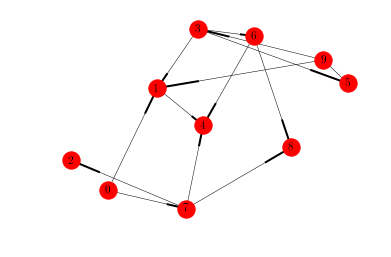

In [11]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


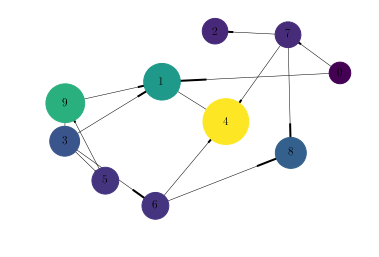

In [12]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

Оценка есть $(1-\delta)^n$ через n операций, где $\delta$- максимум по столбцам нулевого элемента в них.
В эргодической теореме оценка на один элемент, поэтому (мы же сумму модулей считаем) умножим её на размерность вектора. Получим очень большое отклонение от реального значение, ибо оценка с запасом, и будем на нижнем графике и всех последующий estimation рисовать для одного элемента.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


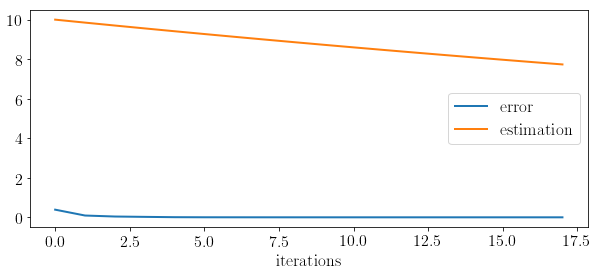

In [13]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
#errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=1)

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, #<верхняя оценка скорости сходимости из эргодической теоремы>, 
         len(pr_trace[-1])*(1 - np.max(np.min(create_page_rank_markov_chain(edges), axis = 0))) ** x,
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


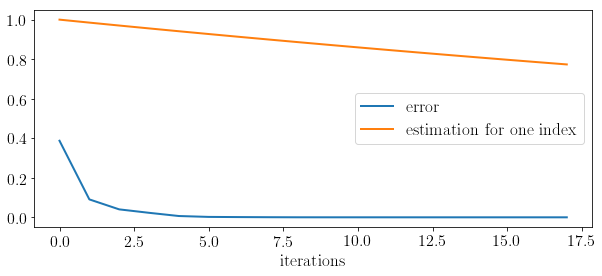

In [14]:
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, #<верхняя оценка скорости сходимости из эргодической теоремы>, 
         (1 - np.max(np.min(create_page_rank_markov_chain(edges), axis = 0))) ** x,
         lw=2, label='estimation for one index')
plt.legend()
plt.xlabel('iterations')
plt.show()

<Выводы>
Оценка берётся с большим запасом. Убывает тоже как степенная функция, но с гораздо меньшим основанием.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

<Исследования и выводы>
Сначала проведём эксперимент для случайного графа. Будем брать $p$ от 0.1 до 0.9 с шагом 0.2 и n=8. Увидим, что скорость сходимости в случае p=0.3 наименьшая, в p=0.1 чуть побольше, и чем больше за 0.3, тем быстрее.  При маленьких $p$ в стационарном распределении более выражен вес отдельных вершин (в силу разреженности графа), поэтому начальное распределение сильнее отклонено от итогового, и сходимость медленнее

In [142]:
def conduct_one_experiment(init_distrib, n_size = 4, p_prob = 0.5, given_graph = None):
    if given_graph is None:
        given_graph = random_graph(n_size, p_prob)
    if n_size is not None and p_prob is not None:
        print 'Experiment for n = ',n_size, ', p= ', p_prob
    G = networkx.DiGraph()
    G.add_edges_from(given_graph)
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5)
    plt.show()
    
    stationary_distribution, intermid_distr = page_rank(given_graph, init_distrib,
                                                        return_trace = True, N = n_size)
    current_errors = np.abs(intermid_distr - stationary_distribution).sum(axis=1)

    size_const = 10 ** 4
    plt.axis('off')
    networkx.draw_networkx(G, width=0.5, node_size=size_const * stationary_distribution, 
                           node_color=stationary_distribution)
    plt.show()
    
    
    plt.figure(figsize=(10, 4))
    x = np.arange(len(current_errors))
    plt.plot(x, current_errors, lw=2, label='error')
    plt.plot(x, #<верхняя оценка скорости сходимости из эргодической теоремы>, 
             (1 - np.max(np.min(create_page_rank_markov_chain(given_graph), axis = 0))) ** x,
             lw=2, label='estimation')
    plt.legend()
    plt.xlabel('iterations')
    plt.show()

Experiment for n =  8 , p=  0.1


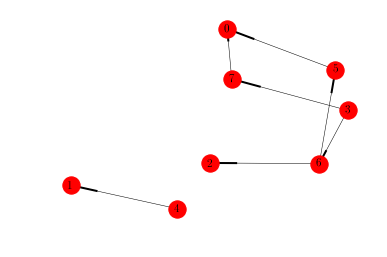

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


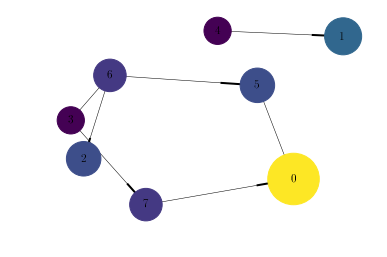

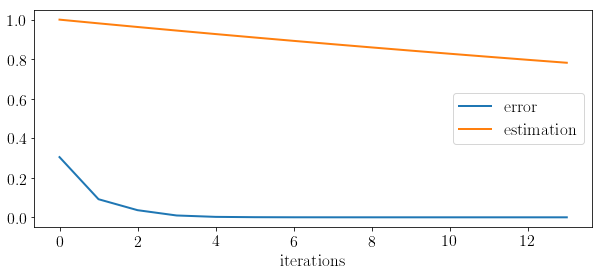

Experiment for n =  8 , p=  0.3


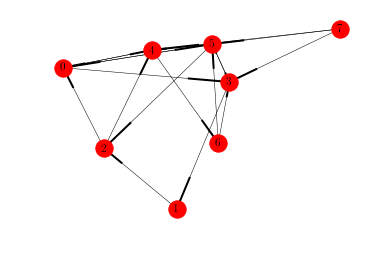

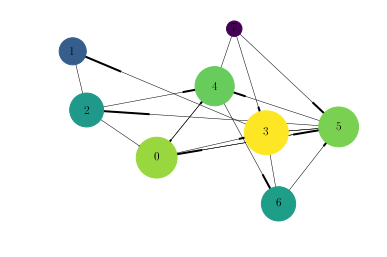

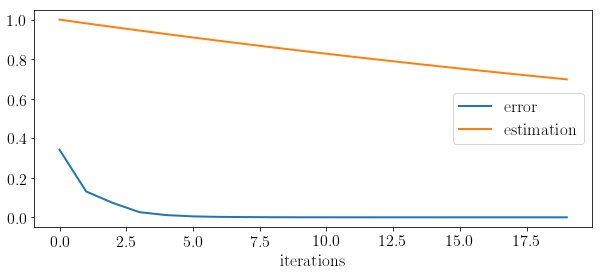

Experiment for n =  8 , p=  0.5


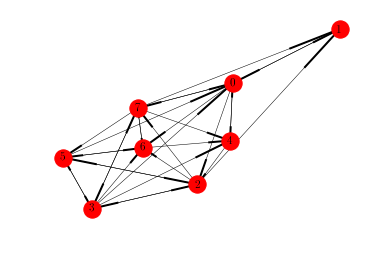

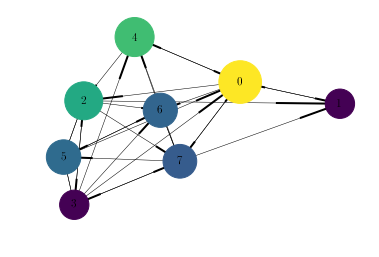

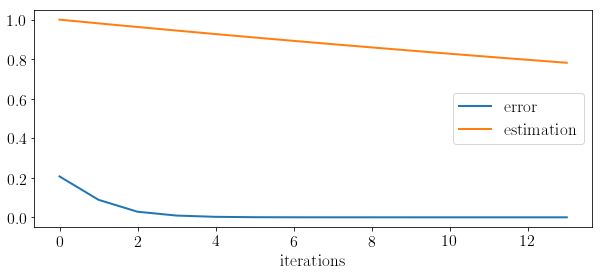

Experiment for n =  8 , p=  0.7


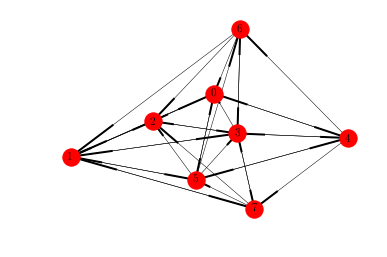

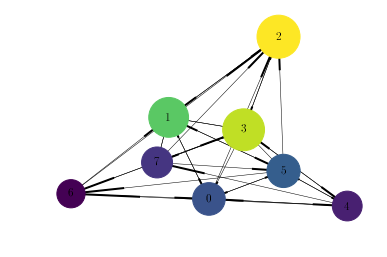

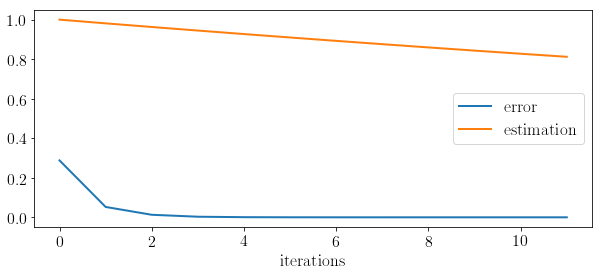

Experiment for n =  8 , p=  0.9


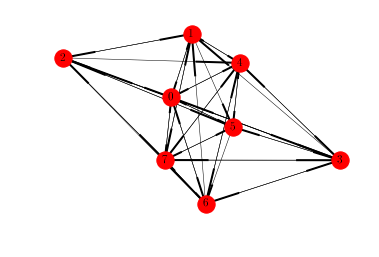

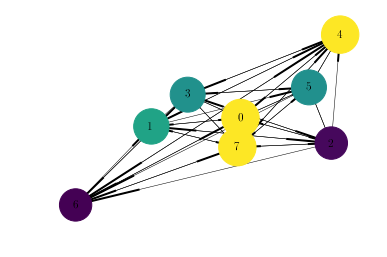

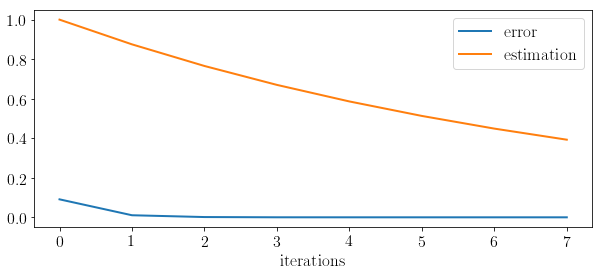

In [144]:
for p in np.linspace(0.1, 0.9, 5):
    n = 8
    conduct_one_experiment(np.ones((n,)).astype(float)*(1./n), n, p)

Далее возьмём p маленьким (чтобы видна была разница по скорости сходимости) и будем брать n=8, 16, 24. Видно, что чем меньше n, тем более неравномерно распределение в конце, и тем меньше скорость сходимости. Видимо, это вызвано появлением вырожденных ситуаций наподобие "в вершину ничего не входит", "из вершины ничего не выходит" на маленьких графах

Experiment for n =  8 , p=  0.2


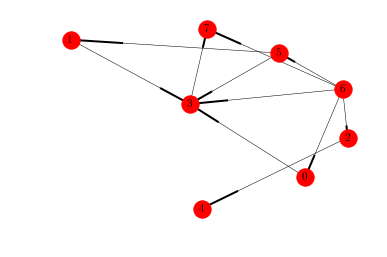

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


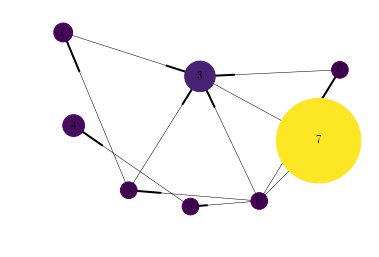

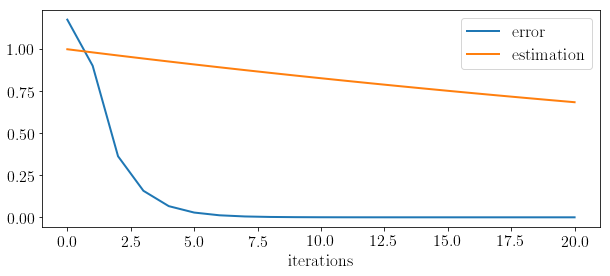

Experiment for n =  12 , p=  0.2


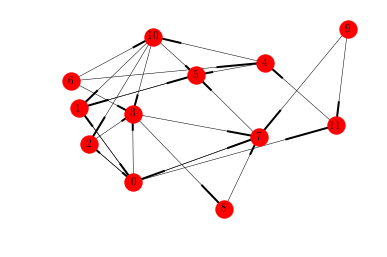

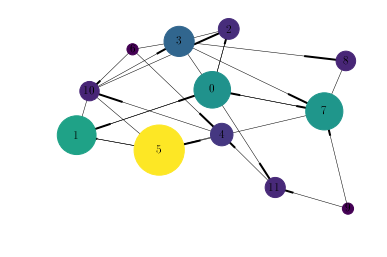

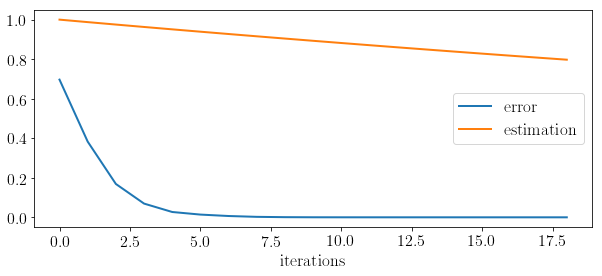

Experiment for n =  16 , p=  0.2


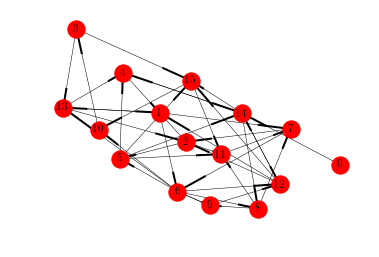

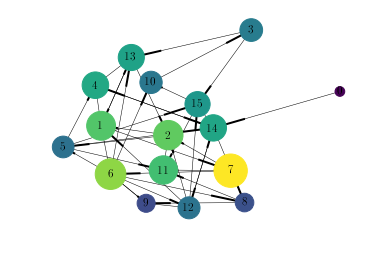

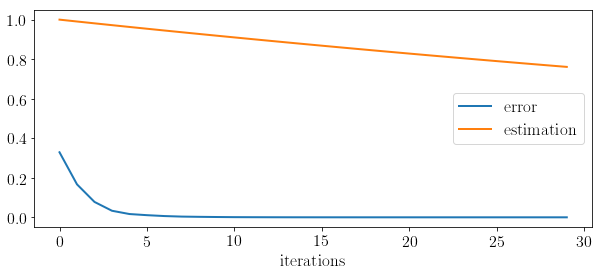

Experiment for n =  20 , p=  0.2


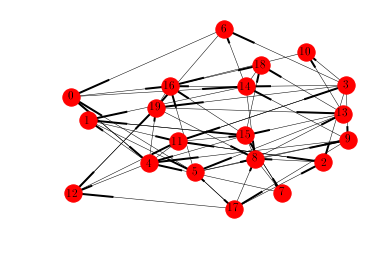

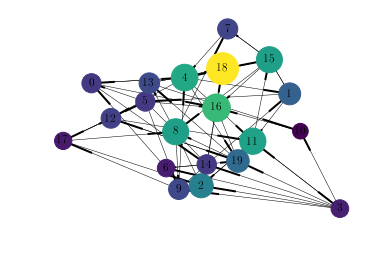

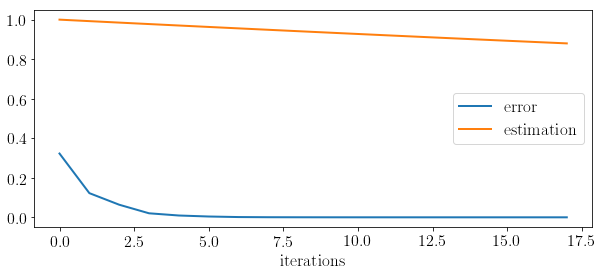

In [145]:
for n in np.arange(8, 24, 4):
    conduct_one_experiment(np.ones((n,)).astype(float)*(1./n), n, 0.2)

Далее будем менять начальное распределение на фиксированном графе из 4 вершин. Видно, что это граф, в котором "все пути ведут в вершину 2", и поэтому скорость сходимость тем больше, чем ближе мы к данной вершине расположены изначально

Experiment for n =  4 , p=  0.5


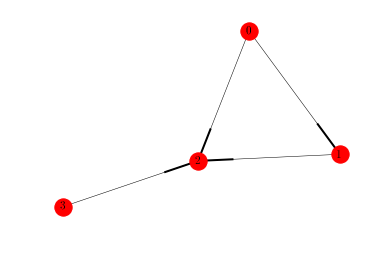

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


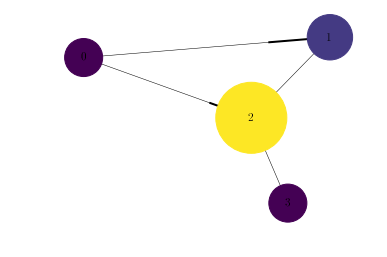

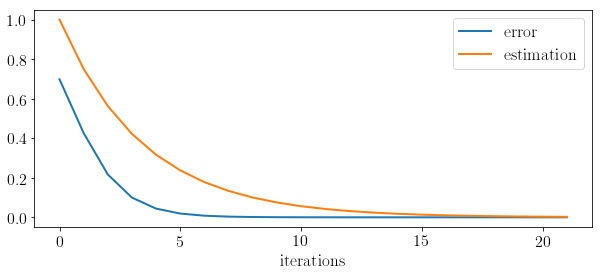

Experiment for n =  4 , p=  0.5


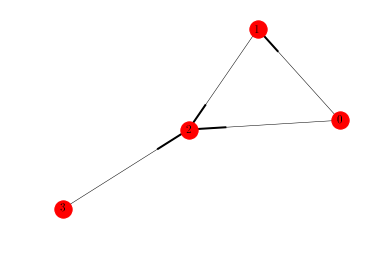

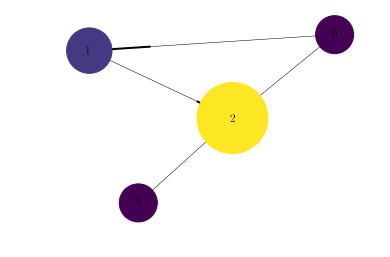

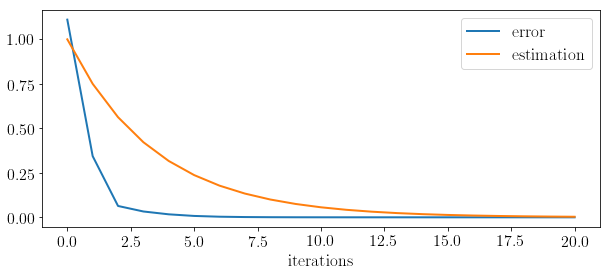

Experiment for n =  4 , p=  0.5


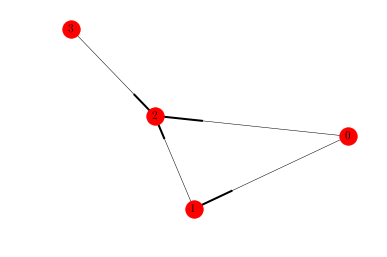

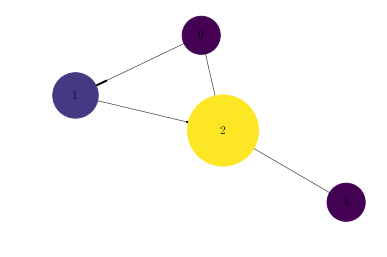

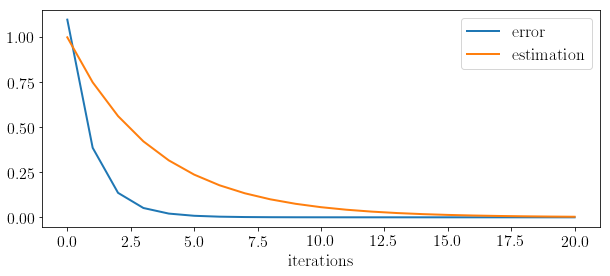

In [156]:
for y in [np.array([0.1, 0.4, 0.2, 0.3]),
         np.array([0.7, 0.1, 0.1, 0.1]),
         np.array([0.45, 0.45, 0.05, 0.05])]:
    n = len(y)
    conduct_one_experiment(y, n, given_graph=np.array([[0,1], [0,2],
                                          [1,2], [3,2]]))

# Part 2 (15%)

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [4]:
def load_links(url, sleep_time=0.1, attempts=3, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

Возьмём этот шаблон и сайт воды "Шишкин лес". В нём примерно 2000 ссылок, но не столь большая разница

In [11]:
urls = ['http://www.cone-forest.ru']
site = get_site(urls[0])
links = []

N = 2000
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
HTTP Error 301: The HTTP server returned a redirect error that would lead to an infinite loop.
The last 30x error message was:
Moved Permanently
HTTP Error 301: The HTTP server returned a redirect error that would lead to an infinite loop.
The last 30x error message was:
Moved Permanently
HTTP Error 301: T

Посмотрим, сколько сайтов, и сохраним считанное в файлы

In [13]:
links = np.array(map(list, links))
print np.max(links)
links.shape

2003


(31600, 2)

In [14]:
with open('shishk.txt', "w") as shishkin_file:
    for t in links.flatten():
        shishkin_file.write(str(t) + '\n')

In [15]:
with open('shishk_url.txt', "w") as shishkin_file:
    for t in np.array(urls).flatten():
        shishkin_file.write(str(t) + '\n')

Считаем обратно, проверим шейпы, чтобы правильно считали

In [29]:
links = []
with open('shishk.txt', "r") as shishkin_file:
    for cur_line in shishkin_file:
        links.append(int(cur_line))
links = map(lambda x,y: [x,y], links[:-1], links[1:])
links = np.array(links)[::2,:]

In [30]:
urls = []
with open('shishk_url.txt', "r") as shishkin_file:
    for cur_line in shishkin_file:
        urls.append(cur_line)

In [31]:
print np.max(links)

2003


In [32]:
links.shape

(31600, 2)

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы. Однако, советуем не выбирать сайты типа kremlin.ru, мало ли что.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

In [82]:
def conduct_website_experiment():
    n_size = np.max(links) + 1
    stationary_distribution, intermid_distr = page_rank(links, np.ones((n_size,)).astype(float)/n_size,
                                                        return_trace = True)
    current_errors = np.abs(intermid_distr - stationary_distribution).sum(axis=1)
    
    G = networkx.DiGraph()
    G.add_edges_from(links)
    size_const = 3 * (10 ** 4)
    plt.axis('off')
    networkx.draw_networkx(G, width=0.01, node_size=stationary_distribution * size_const,
                           node_color=map(lambda x:(np.random.uniform(high=1, low=0),
                                          np.random.uniform(high=1, low=0),
                                          np.random.uniform(high=1, low=0)),  stationary_distribution),
                          with_labels = False)
    plt.show()
    
    
    plt.figure(figsize=(10, 4))
    x = np.arange(len(current_errors))
    plt.plot(x, current_errors, lw=2, label='error')
    plt.plot(x,
             (1 - np.max(np.min(create_page_rank_markov_chain(links), axis = 0))) ** x,
             lw=2, label='estimation')
    plt.legend()
    plt.xlabel('iterations')
    plt.show()
    
    plt.axis('off')
    networkx.draw_networkx(G, width=0.01, node_size=intermid_distr[9,:].flatten() * size_const,
                           node_color=map(lambda x:(np.random.uniform(high=1, low=0),
                                          np.random.uniform(high=1, low=0),
                                          np.random.uniform(high=1, low=0)),  stationary_distribution),
                          with_labels = False)
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(stationary_distribution)), np.sort(stationary_distribution)[::-1] )
    plt.title('Weights in decreased order')
    plt.show()
    print 'Minimal weight is equal to ', np.min(stationary_distribution)
    print 'The 15th weight is equal to ', stationary_distribution[14]

Нарисуем искомый граф и отсортированный график весов. Примерно видно, что надо брать первые 15-20 вершин, чтобы посмотреть на вершины стоящего веса. Поскольку реальная сходимость быстрая, то теоретическая оценка вообще как прямая выглядит

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


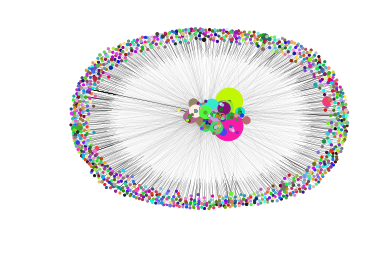

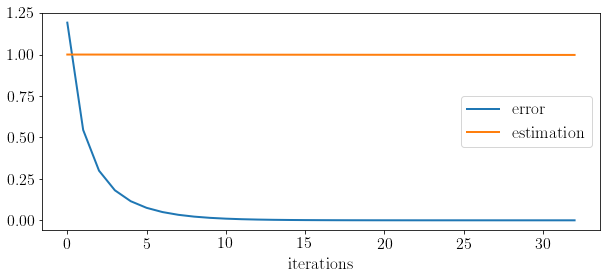

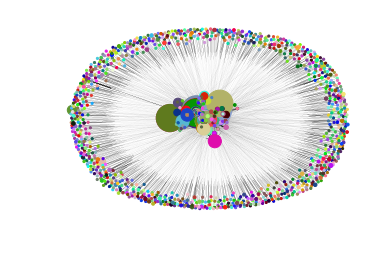

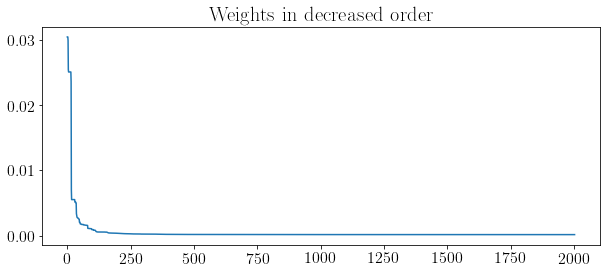

Minimal weight is equal to  0.000153436795256
The 15th weight is equal to  0.0250692429603


In [83]:
conduct_website_experiment()

Слежующая функция строит подграф на указанных 15 вершинах, когда рассматривает сходимость для всего графа за заданное число итераций. Будем задавать начальное распределение для этих 15 вершин, на остальных 1988=2003-15 вершинах будет равномерное распределение остатка. Мы рассмотрим сходимость за 10 итераций, исходя из графика выше. Будем в качестве начального распределения для данных вершин брать равные вероятности, равные w. Затем попробуем на более "тяжёлых" пяти дать одну вероятность, на оставшихся - другую. 

В первом случае с убыванием w изображение графа получается более "растянутое", то есть мы не успели достаточно сойтись. Видимо, на часть из этих 15 вершин ведёт меньше ссылок, чем на остальные, и мы в них ещё недостаточно часто напопадали.

Во втором случае распределение дальше от конечного, если присвоить более тяжёлым вершинам маленький вес, а лёгким - тяжёлый (ибо начальное распределение сильнее отличается от конечного)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


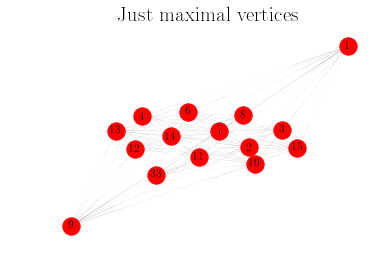

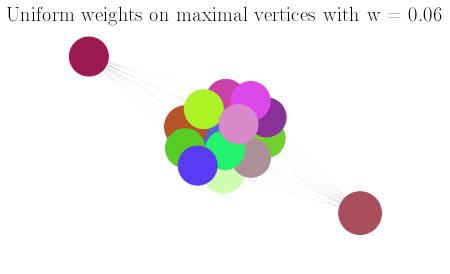

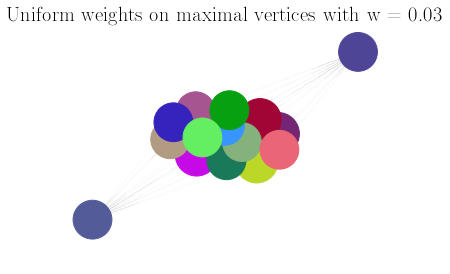

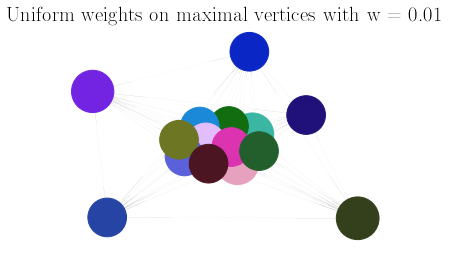

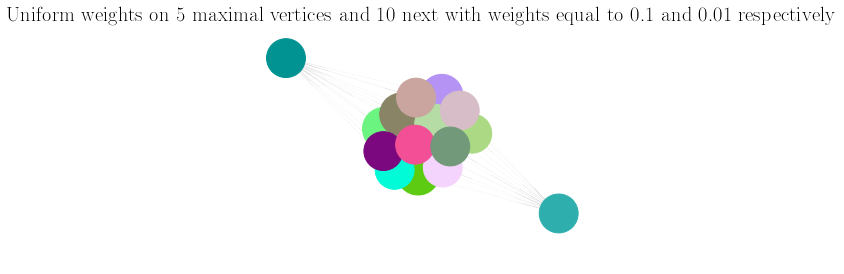

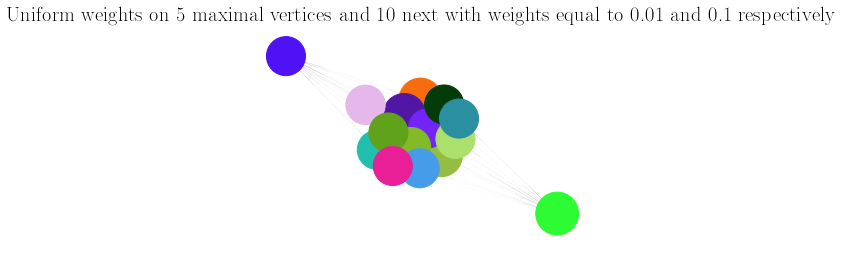

In [87]:
def choose_maximal_nodes(num_max_nodes = 15, num_iterations = None, init_distrib = None):
    n_size = np.max(links) + 1
    stationary_distribution, intermid_distr = page_rank(links, np.ones((n_size,)).astype(float)/n_size,
                                                        return_trace = True)
    max_weigth_indices = np.argsort(stationary_distribution)[::-1][:num_max_nodes]
    graph_on_max = []
    for i in range(links.shape[0]):
        if links[i,0] in max_weigth_indices and links[i,1] in max_weigth_indices:
            graph_on_max.append([links[i,0], links[i,1]])
    graph_on_max = np.array(graph_on_max)
    if init_distrib is None:
        init_distrib = np.ones((num_max_nodes,)).astype(float)/num_max_nodes
    
    G = networkx.DiGraph()
    G.add_edges_from(graph_on_max)
    size_const = 6 * (10 ** 4)
    plt.axis('off')
    networkx.draw_networkx(G, width=0.01)
    plt.title('Just maximal vertices')
    plt.show()
    def draw_max_graph(some_init_distr, some_title):
        real_init_distribution = (np.ones((n_size,)).astype(float) * (1-np.sum(some_init_distr)))/n_size
        real_init_distribution[max_weigth_indices] += some_init_distr
        stationary_distribution, intermid_distr = page_rank(links, real_init_distribution,
                                                        return_trace = True)
        some_num_iterations = num_iterations
        if num_iterations is None:
            some_num_iterations = -1
        stationary_distribution = np.take(intermid_distr[num_iterations,:].flatten(), max_weigth_indices)
        plt.axis('off')
        networkx.draw_networkx(G, width=0.01, node_size=stationary_distribution * size_const,
                               node_color=map(lambda x:(np.random.uniform(high=1, low=0),
                                              np.random.uniform(high=1, low=0),
                                              np.random.uniform(high=1, low=0)),  stationary_distribution),
                              with_labels = False)
        plt.title(some_title)
        plt.show()
    for s,t in zip([np.ones(num_max_nodes).astype(float) * k for k in [0.06, 0.03, 0.01] ] +
                 [np.array([k]*5 + [l]*10) for k,l in zip([0.1, 0.01], [0.01, 0.1]) ],
                 ['Uniform weights on maximal vertices with w = ' + str(w) for w in [0.06, 0.03, 0.01]] +
                 ['Uniform weights on 5 maximal vertices and 10 next with weights equal to ' +
                 str(v)+' and ' + str(w)+' respectively' for v, w in zip([0.1, 0.01], [0.01, 0.1])]):
        draw_max_graph(s,t)
        
choose_maximal_nodes(num_iterations = 10)

Выведем эти пятнадцать ссылок. Видно, что это стартовая страница и страницы, на которые из неё ведут ссылки в левой и верхних "панельках". Можно сделать вывод, что пользователь обычно сидит на главной странице и редко спускается вглубь сайта на какие-то статьи и каталог продукции

In [37]:
def show_max_nodes_sites(num_max_nodes = 15):
    n_size = np.max(links) + 1
    stationary_distribution, intermid_distr = page_rank(links, np.ones((n_size,)).astype(float)/n_size,
                                                        return_trace = True)
    max_weigth_indices = np.argsort(stationary_distribution)[::-1][:num_max_nodes]
    print [urls[i] for i in max_weigth_indices]

show_max_nodes_sites()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


['http://www.cone-forest.ru/search/\n', 'http://www.cone-forest.ru/./cabinet/register/\n', 'http://www.cone-forest.ru/./cabinet/remember/\n', 'http://www.cone-forest.ru/./\n', 'http://www.cone-forest.ru/./water/\n', 'http://www.cone-forest.ru/./news/\n', 'http://www.cone-forest.ru/./poleznie_stati/\n', 'http://www.cone-forest.ru/./contacts/\n', 'http://www.cone-forest.ru/./career/\n', 'http://www.cone-forest.ru/./production/\n', 'http://www.cone-forest.ru/./uslugi/\n', 'http://www.cone-forest.ru/./about/\n', 'http://www.cone-forest.ru/./sitemap/\n', 'http://www.cone-forest.ru/contacts/\n', 'http://www.cone-forest.ru/\n']


## Part 3 (50%)

Для выполнения этой части вам потребуется библиотека RankLib https://sourceforge.net/p/lemur/wiki/RankLib/

Скачайте датасет с конкурса «Интернет-математика 2009»
https://academy.yandex.ru/events/data_analysis/grant2009/

Разбейте его на три части train, test, valid размера 10% каждая.
Функции, реализующие это, возьмите с семинара.
Правда, привести файл к формату SVM-Rank (см. документацию по RankLib) придется самостоятельно.

Обучите на train методы MART и LambdaMART на 300 итераций, указав им метрику NDCG и передав так же valid.
Записывайте сюда команды аналогично тому, как это было сделано на семинаре.
Значения метрики в зависимости от номера итерации сохранились в log-файле.
Для считывания поможет приведенная ниже функция.

Напишем своё считывание, как и просится. Поскольку считали в своём виде (объект из спарс матрицы фичей - вектора релевантностей и дикта "запрос - номера строк, ему соответствующих"), то и сплиты напишем свои. Сплиты будут идти по множеству запросов

In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import load_svmlight_file, dump_svmlight_file
from collections import defaultdict
def custom_svm_read(fname):
    csr_res, relevances = load_svmlight_file(fname)
    query_ids = []
    with open(fname, "r") as cur_file:
        for cur_line in cur_file:
            query_ids.append(int(cur_line.split('#')[1]))
    query_line_dict = defaultdict(list)
    for ind, cur_query_id in enumerate(query_ids):
        query_line_dict[cur_query_id].append(ind)
    return csr_res, relevances, query_line_dict

imat_learn_open = custom_svm_read('imat2009_learning.txt')

from sklearn.model_selection import train_test_split
def split_query_wise(svm_read_result, train_share, test_share):
    train_queries, test_queries = train_test_split(np.array(svm_read_result[2].keys()),
                                                   test_size=test_share,
                                                   random_state=323)
    train_indices = sum([svm_read_result[2][i] for i in train_queries], [])
    test_indices = sum([svm_read_result[2][i] for i in test_queries], [])
    from scipy.sparse import vstack as sparse_vstack
    
    def get_splitted_dict(init_dict, indices):
        ind_query_dict = dict()
        for cur_key, cur_vals in zip(init_dict.keys(), init_dict.values()):
            for cur_ind in cur_vals:
                ind_query_dict[cur_ind] = cur_key
        ind_query_dict_for_split = {i:ind_query_dict[i] for i in indices}
        order_ind_dict = dict(enumerate(indices))
        query_new_ind_zip = [(ind_query_dict_for_split[order_ind_dict[i]], i) for i in order_ind_dict.keys()]
        ans = defaultdict(list)
        for cur_query, cur_newind in query_new_ind_zip:
            ans[cur_query].append(cur_newind)
        return ans

    train_obj = (sparse_vstack([svm_read_result[0][i,:] for i in train_indices]),
                np.take(svm_read_result[1], train_indices),
                get_splitted_dict(svm_read_result[2], train_indices))
    test_obj = (sparse_vstack([svm_read_result[0][i,:] for i in test_indices]),
                np.take(svm_read_result[1], test_indices),
                get_splitted_dict(svm_read_result[2], test_indices))
    return train_obj, test_obj

def make_train_test_val_objects(init_obj, train_share, test_share, val_share):
    share_to_take = train_share + test_share + val_share
    all_obj = split_query_wise(init_obj, share_to_take, 1 - share_to_take)[0]
    train_obj, left_obj = split_query_wise(all_obj,
                                           train_share/(train_share + test_share + val_share),
                                           (test_share + val_share)/(train_share + test_share + val_share))
    test_obj, val_obj = split_query_wise(left_obj,
                                        test_share/(test_share + val_share),
                                        val_share/(test_share + val_share))
    return train_obj, test_obj, val_obj

imat_train, imat_test, imat_val = make_train_test_val_objects(imat_learn_open,
                                                             0.1, 0.1, 0.1)


In [2]:
def write_obj_to_file(some_obj, file_path):
    ''' Создает файл по адресу file_path, в который будут записаны релевантности relevs,
    номера запросов qids и признаки features с номера index_begin по index_end. '''
    def get_groups(query_dict):
        ans = np.zeros((len(sum(query_dict.values(), [])),))
        for cur_key, cur_vals in zip(query_dict.keys(), query_dict.values()):
            for some_val in cur_vals:
                ans[some_val] = cur_key
        return ans
    qids = get_groups(some_obj[2])
    with open(file_path, 'w') as f:
        for index_line in range(some_obj[0].shape[0]):
            f.write('{} qid:{}'.format(some_obj[1][index_line], qids[index_line]))
            for i in range(some_obj[0].shape[1]):
                f.write(' {}:{}'.format(i + 1, some_obj[0][index_line, i]))
            f.write('\n')

In [3]:
for obj_name, fname in zip([imat_train, imat_test, imat_val],
                           ['train_file.txt', 'test_file.txt', 'valid_file.txt']):
    write_obj_to_file(obj_name, fname)

Следующую функцию возьмём с семинара, добавим только параметр отступа до строки Training starts, чтобы эту же функцию и в RankNet использовать

In [4]:
def read_metric_dependence_from_file(file_name, num_lines, num_blocks=1, shift = 4):
    ''' Извлекает значения метрики в процессе обучения из log-файлов, 
    создаваемых библиотекой RankLib при обучении.
        file_name --- имя log-файла
        num_lines --- число строк, в которых записаны значения. 
                      Смысл --- количество выполненых итераций при обучении.
        num_blocks --- количество блоков значений. 
                       Смысл --- число k в случае k-fold CV
                       
        Возвращает лист из np.array в количестве num_blocks.
    Первый столбец каждого np.array --- номер итерации. Все следующие --- значения.
    '''
    
    with open(file_name) as f:
        text = f.readlines()
    
    values = []
    for block_id in range(num_blocks):
        index = text.index('Training starts...\n') + shift
        block_values = np.array(list(map(lambda x: list(map(float, x.split('|')[:-1])), 
                                         text[index:index + num_lines])))
        values.append(block_values)
        text = text[index:]
        
    return values

Постройте график значения метрики NDCG в зависимости от номера итерации на train и valid для ранее обученных моделей MART и LambdaMART.

In [5]:
for i in [imat_train, imat_test, imat_val]:
    print i[0].shape

(9864, 245)
(9476, 245)
(9822, 245)


Извлечём для всех запросов в трейне число документов, им соответствующих, посортим, и построим график. Видно, что для всех запросов, кроме оочень маленького числа, значение не превосходит 20 с небольшим. Поэтому будем брать ndcg@22. Это позволит не обучаться излишне на эти пару десятков запросов и сэкономит время обучения. А ещё уменьшим learning rate, иначе деревьев слишком мало реально оказывается в файле (модель, видимо, не генерирует новых деревьев с какого-то момента). В итоге их вышло больше 300, поэтому построим график для числа деревьев от 1 до 300 и от 1 до 400

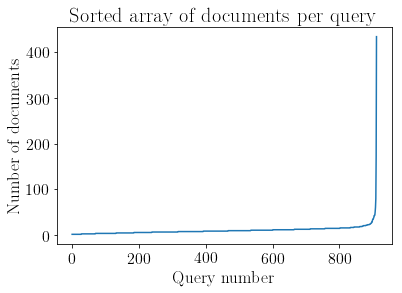

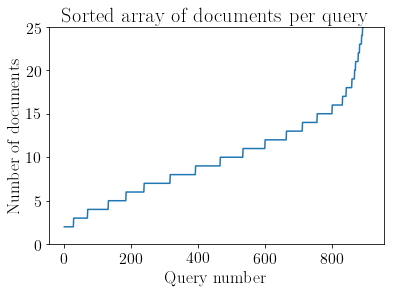

Mean value is equal to  10.8157894737


In [6]:
plt.plot(np.arange(len(imat_train[2].keys())), np.sort(np.array(map(len, imat_train[2].values()))))
plt.xlabel('Query number')
plt.ylabel('Number of documents')
plt.title('Sorted array of documents per query')
plt.show()

plt.plot(np.arange(len(imat_train[2].keys())), np.sort(np.array(map(len, imat_train[2].values()))))
plt.xlabel('Query number')
plt.ylabel('Number of documents')
plt.title('Sorted array of documents per query')
plt.ylim((0,25))
plt.show()
print 'Mean value is equal to ', np.mean(np.array(map(len, imat_train[2].values())))

In [116]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./train_file.txt -test ./test_file.txt -validate ./valid_file.txt -ranker 6 -tree 500 -shrinkage 0.018 -estop 300 -metric2t NDCG@22 -save ./model_LambdaMART.txt > ./log_LambdaMART.txt

CPU times: user 2.23 s, sys: 440 ms, total: 2.67 s
Wall time: 1min 43s


In [117]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./train_file.txt -test ./test_file.txt -validate ./valid_file.txt -ranker 0 -tree 500 -shrinkage 0.018 -estop 300 -metric2t NDCG@22 -save ./model_MART.txt > ./log_MART.txt

CPU times: user 1.9 s, sys: 420 ms, total: 2.32 s
Wall time: 1min 30s


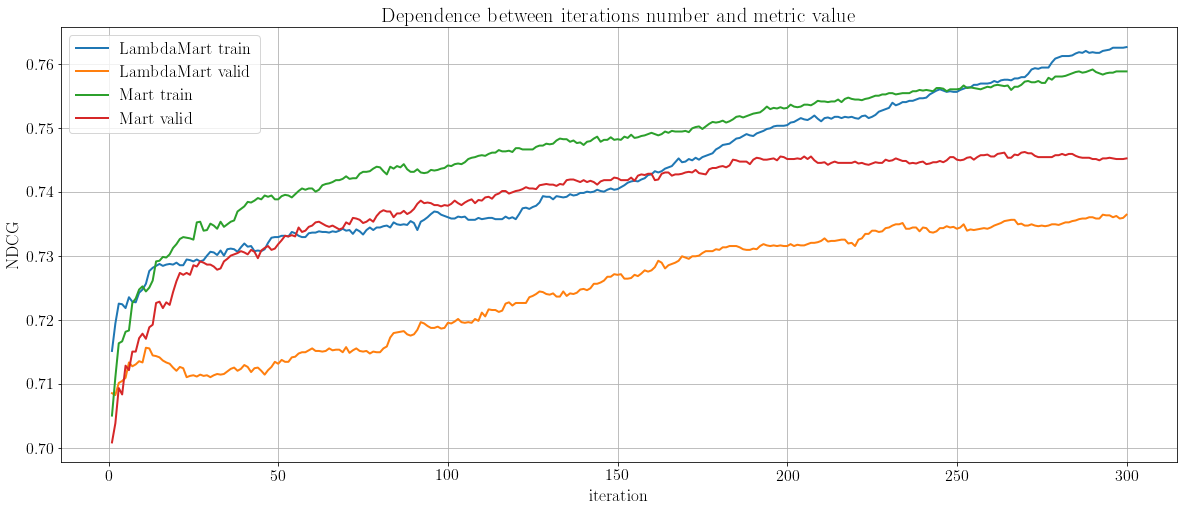

In [118]:
values = (read_metric_dependence_from_file('./log_LambdaMART.txt', 300)[0],
          read_metric_dependence_from_file('./log_MART.txt', 300)[0])

def plotgraph(vals, names, len_graph = 300):
    plt.figure(figsize=(20, 8))
    for i in range(len(names)):
        plt.plot(np.arange(len_graph) + 1, vals[i], lw=2, label=names[i])
    plt.xlabel('iteration')
    plt.ylabel('NDCG')
    #plt.title(<...>)
    plt.title('Dependence between iterations number and metric value')
    plt.legend(loc=2)
    plt.grid()
    plt.show()
    
plotgraph([values[0][:, 1], values[0][:, 2], values[1][:, 1], values[1][:, 2]],
          ['LambdaMart train', 'LambdaMart valid', 'Mart train', 'Mart valid'])

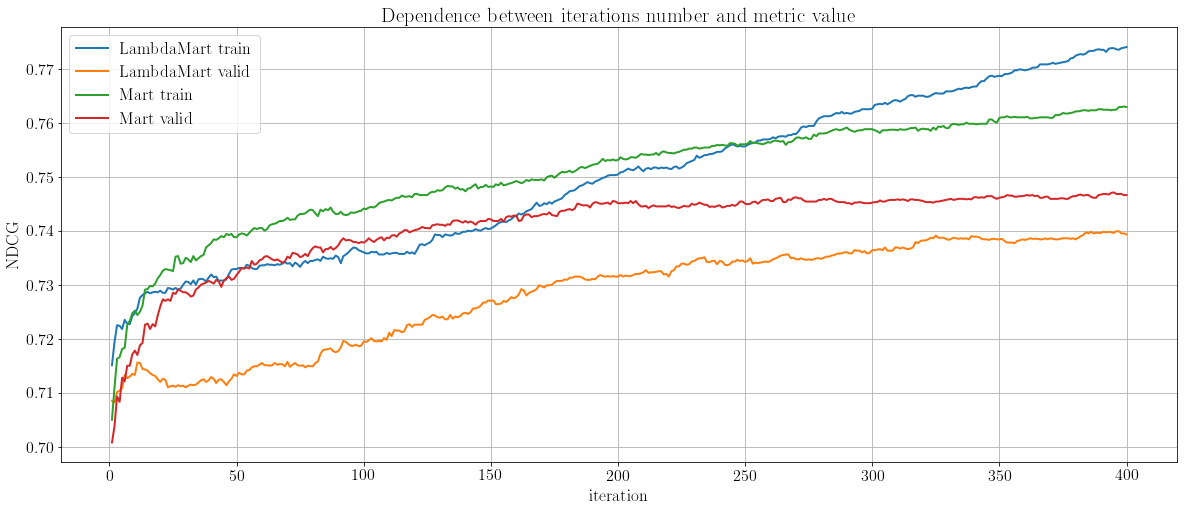

In [119]:
values_full = (read_metric_dependence_from_file('./log_LambdaMART.txt', 400)[0],
          read_metric_dependence_from_file('./log_MART.txt', 400)[0])
plotgraph([values_full[0][:, 1], values_full[0][:, 2], values_full[1][:, 1], values_full[1][:, 2]],
          ['LambdaMart train', 'LambdaMart valid', 'Mart train', 'Mart valid'], 400)

Можно ли сказать, что какая-то модель работает лучше? Достигается ли точка переобучения?

<Ответ> Видно, что графики "скачут" локально, LambdaMart valid так вообще сильно просел около 15-20 деревьев. Mart фактически не даёт прироста после 250 деревьев, LambdaMart - после 320. Точка переобучения здесь не достигается. Когда ставился больший learning rate, она как бы достигалась. Но реально это происходило потому, что модель использовала старые деревья и не строила новых (как было видно из файла с моделью). Mart выглядит получше, да и учится быстрее


Постройте аналогичные графики для Random Forests и RankNet (по отдельности).
Какие выводы можно сделать?

In [85]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./train_file.txt -test ./test_file.txt -validate ./valid_file.txt -ranker 8 -bag 300 -estop 300 -metric2t NDCG@22 -save ./model_RF.txt > ./log_RF.txt

CPU times: user 5.5 s, sys: 1.06 s, total: 6.56 s
Wall time: 3min 54s


In [86]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./train_file.txt -test ./test_file.txt -validate ./valid_file.txt -ranker 1 -epoch 300 -estop 300 -layer 2 -node 15 -metric2t NDCG@22 -save ./model_RankNet.txt > ./log_RankNet.txt

CPU times: user 15.3 s, sys: 3.12 s, total: 18.4 s
Wall time: 11min 48s


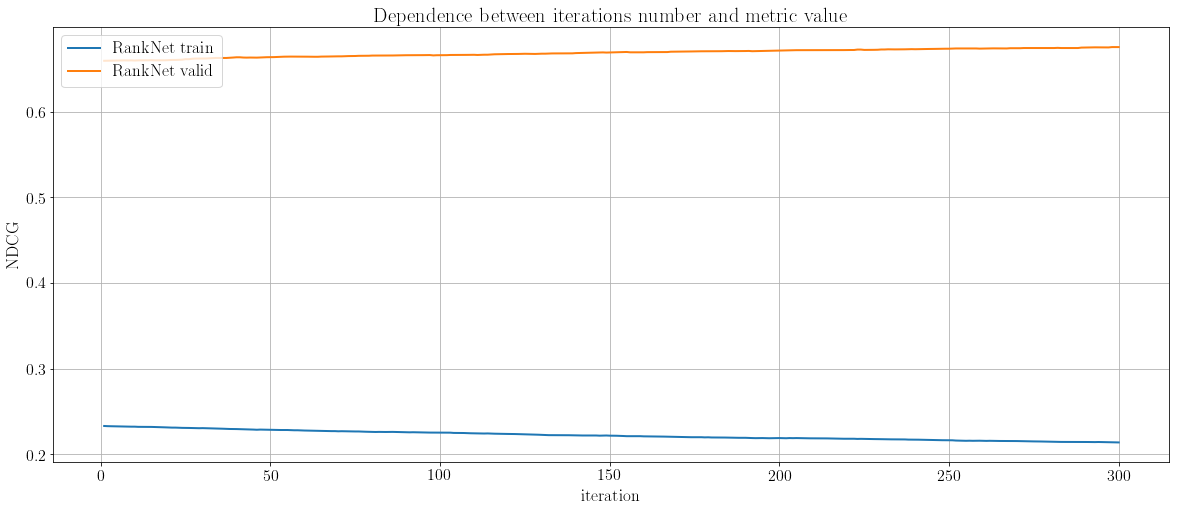

In [87]:
values = read_metric_dependence_from_file('./log_RankNet.txt', 300, shift = 5)[0]
plotgraph([values[:,1], values[:,2]], ['RankNet train', 'RankNet valid'])

Вывод для  ranknet: очень плохо. Обучается фактически за 1-2 итерации, дальше мизерныей прирост на трейне и убывание на валидационной (модель упорно переучивается). Скор вообще никудышный

Модель с лесами не хранит промежуточных результатов, поэтому напишем функцию, которая понадобится и в следующем пункте. Она будет брать все префиксы файла с моделью на 300 итераций (куски для k<=300 итераций), дописывать что-то в конце, если нужно, и менять строку в начале, сигнализирующую об общем числе итераций в файле. Затем полученный файл она будет подавать в качестве модели, в конце построим графики.

In [6]:
def plotgraph(vals, names, len_graph = 300):
    plt.figure(figsize=(20, 8))
    for i in range(len(names)):
        plt.plot(np.arange(len_graph) + 1, vals[i], lw=2, label=names[i])
    plt.xlabel('iteration')
    plt.ylabel('NDCG')
    #plt.title(<...>)
    plt.title('Dependence between iterations number and metric value')
    plt.legend(loc=2)
    plt.grid()
    plt.show()

In [7]:
def get_cut_version_of_file(fname, last_ind,
                            tmp_name, change_str_num = None,
                            change_val = None, append_str = None):
    
    with open(fname, "r") as f:
        text = f.readlines()
    if change_str_num is not None:
        for ind, new_val in zip(change_str_num, change_val):
            text[ind] = new_val
    cut_text = text[:(last_ind + 1)]
    if append_str is not None:
        cut_text += append_str
    with open(tmp_name, "w") as f:
        for cur_line in cut_text:
            f.write(cur_line)

In [9]:
from tqdm import tqdm
def get_prefix_results(fname, keyword, max_pref_len,
                       function_for_prefix_file,
                            change_str_num = None,
                            change_vals = None, append_str = None):
    
    with open(fname, "r") as f:
        text = f.readlines()
    required_indices = []
    for ind, cur_line in enumerate(text):
        if keyword in cur_line.split():
            required_indices.append(ind)
    results = []
    for i, last_line in tqdm(enumerate(required_indices[:max_pref_len])):
        val_to_change = None
        if change_vals is not None:
            val_to_change = change_vals[i]
            if type(val_to_change) != list:
                val_to_change = [val_to_change]
        get_cut_version_of_file(fname, last_line,
                            'tmp___.txt', change_str_num,
                            val_to_change, append_str)
        results.append(function_for_prefix_file())
        ! rm -f ./tmp___.txt
    return results

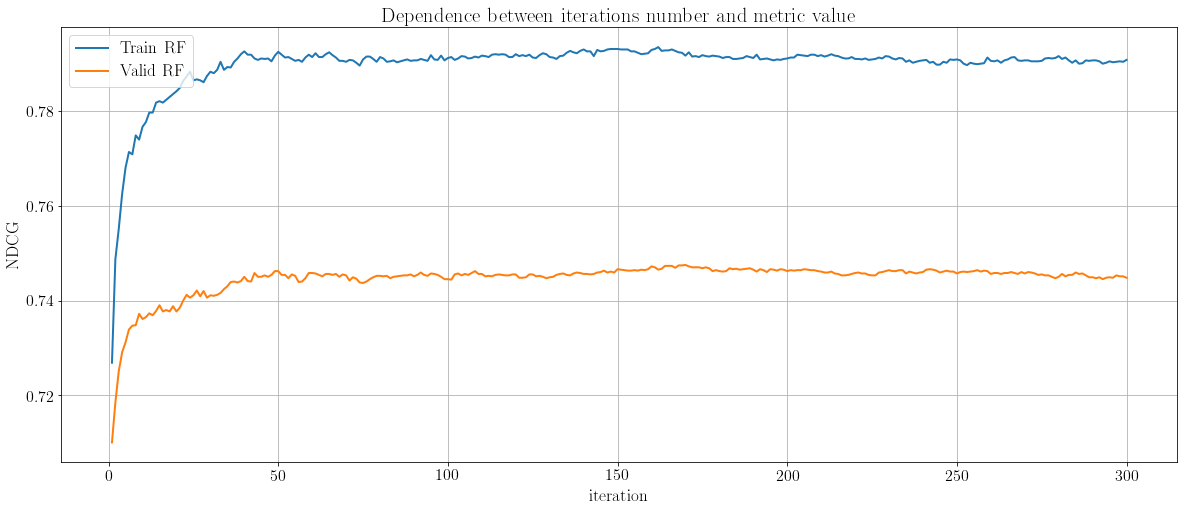

CPU times: user 1min 14s, sys: 34.3 s, total: 1min 49s
Wall time: 35min 23s


In [103]:
%%time
def func_for_prefix_rf():
    ! java -jar RankLib-2.1-patched.jar -load ./tmp___.txt -test ./train_file.txt \
       -metric2t NDCG@22 -save ./tmp_model.txt > ./tmp_log.txt
    def get_score():
        with open('tmp_log.txt', "r") as f:
            text = f.readlines()
            return float(text[-1].split()[-1])
    train_ans = get_score()
    ! rm -f ./tmp_log.txt
    ! java -jar RankLib-2.1-patched.jar -load ./tmp___.txt -test ./valid_file.txt \
       -metric2t NDCG@22 -save ./tmp_model.txt > ./tmp_log.txt
    val_ans = get_score()
    ! rm -f ./tmp_log.txt
    return [train_ans, val_ans]

rf_results = vals_for_rf = get_prefix_results('model_RF.txt',
                                 '</ensemble>', 300,
                                 func_for_prefix_rf, [1],
                                 ['## No. of bags = '+str(i+1)+'\n' for i in range(300)])
rf_results = np.array(rf_results)
plotgraph([rf_results[:,0].flatten(), rf_results[:,1].flatten()], ['Train RF', 'Valid RF'])

Вывод: скор, как у MART, но быстрее скорость обучения, и здесь видна уже точка переобучения в районе 180 деревьев

#### Сглаживание дискретных метрик

Одна из основных проблем в обучении ранжированию --- дискретность метрик.
Мы знаем, как решается эта проблема в LambdaRank и LambdaMART (см. вопрос выше).
Однако, в некоторых задачах нужно использовать саму метрику.
В связи с этим возникают задачи разработки сглаженных версий дискретных метрик.
Рассмотрим самый простой из них.

Пусть $X_{train}$ --- обучающая выборка. Разобьем ее на две части независимо $M$ раз: $X_{train} = X_1^m \sqcup X_2^m$, причем разбиение будем производить *по запросам*, то есть пары $(q, d_1)$ и $(q, d_2)$ попадают в одну из этих двух частей. Далее обучаем наш метод на $X_1^m$ и применяем к $X_{test}$ --- тестовая выборка. Так мы получим $M$ чисел $Z_1, ..., Z_M$, каждое из которых есть значение метрики. Их усреднение дает сглаженное значение метрики.

Почему такой способ является нечестным? Как нужно было бы действовать честно?

Наверное, нужно брать деление на 10 фолдов и каждый раз выкидывать 1 фолд, чтобы каждый элемент "по-равному" вкладывал в итоговую метрику

Теперь вам предстоит построить график сглаженной метрики $NDCG_{10}$ для LambdaMART c 300 деревьями и $M=10$.
Алгоритм примерно следующий:

на каждой итерации
* перемешать $X_{train}$ по запросам. Для этого есть специальная команда, см. описание библиотеки.
* разбить $X_{train}$ на две части. Для этого есть функция с семинара.
* обучить LambdaMART на первой части на 300 деревьях. Валидационную выборку передавать не нужно.
* посчитать значение NDCG на $X_{test}$ по полученной модели в зависимости от количества деревьев.

В последнем пункте имеется ввиду следующее. 
Пусть модель представляется в виде $F(x) = \sum\limits_{t=1}^T \alpha_t f_t(x)$.
Нужно посчитать значение метрики по всем моделям $F(x) = \sum\limits_{t=1}^K \alpha_t f_t(x), K=1, ..., T$.

Для реализации вам потребуется самостоятельно создать файл с такой моделью на основе файла с обученной моделью, который представляет из себя список деревьев с некоторой дополнительной информацией.
Вам нужно в свой файл последовательно добавлять деревья по одному, а затем использовать команду для подсчета значения метрики на тестовой выборке по этой модели, см. описание библиотеки.

Выполнив эти операции, постройте график сглаженной метрики. Сравните с графиком исходной метрики.

Разбивать будем так, чтобы в $X_1$ было от 0.2 до 0.8 от всего трейна, чтобы избежать всяких эксцессов из-за маленькой подвыборки и повторения метрики ввиду большой подвыборки

340it [22:17,  3.93s/it]
340it [22:21,  3.95s/it]
340it [22:10,  3.91s/it]
340it [22:18,  3.94s/it]
340it [22:29,  3.97s/it]
340it [22:17,  3.94s/it]
340it [22:25,  3.96s/it]
340it [22:17,  3.93s/it]
340it [22:21,  3.94s/it]
340it [22:18,  3.94s/it]
340it [22:17,  3.93s/it]
340it [22:18,  3.94s/it]
340it [22:25,  3.96s/it]
340it [22:18,  3.94s/it]
340it [22:25,  3.96s/it]
340it [22:18,  3.94s/it]
340it [22:25,  3.96s/it]
340it [22:20,  3.94s/it]
340it [22:30,  3.97s/it]
340it [22:18,  3.94s/it]


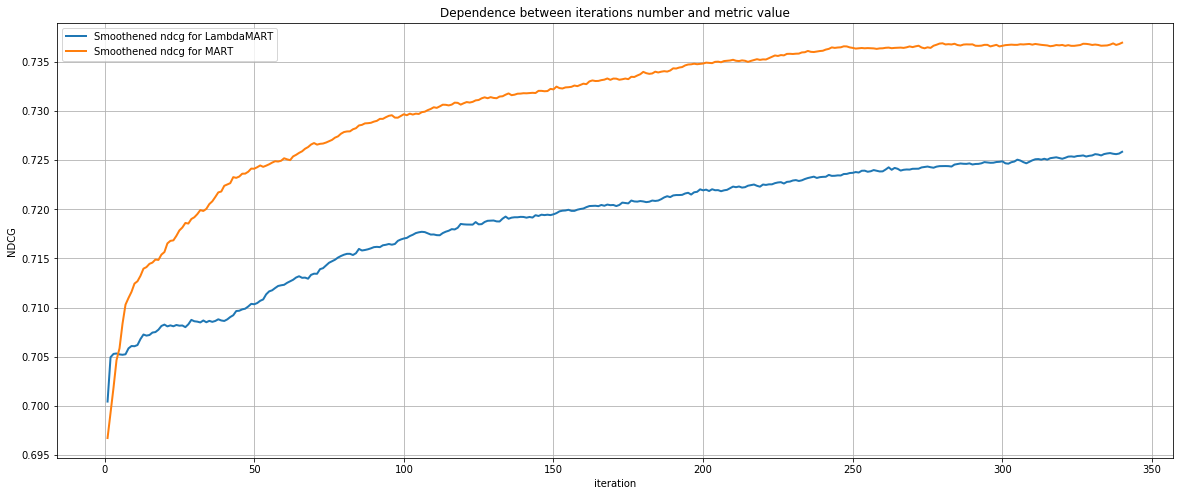

In [17]:
def mart_func():
    ! java -jar RankLib-2.1-patched.jar -load ./tmp___.txt -test ./test_file.txt \
       -metric2t NDCG@22 -save ./tmp_model.txt > ./tmp_log.txt
    def get_score():
        with open('tmp_log.txt', "r") as f:
            text = f.readlines()
            return float(text[-1].split()[-1])
    test_ans = get_score()
    ! rm -f ./tmp_log.txt
    return test_ans

ans = 0
def get_smoothen_vals(M = 10, fnames = [], graph_names = [], tree_functions = [],
                      file_to_write_tmp_results = None):
    results_for_fnames = [list() for _ in fnames]
    for i in range(len(results_for_fnames)):
        results_for_fnames[i] = [list() for _ in range(M)]
    def get_one_iteration_result(fname, tree_func):
        return get_prefix_results(fname, '</tree>', 340,
                                 tree_func, [1],
                                  ['## No. of trees = '+str(i+1)+'\n' for i in range(340)],
                                 ['</ensemble>\n'])
    file_for_results = None
    if file_to_write_tmp_results is not None:
        file_for_results = open(file_to_write_tmp_results, "w")
    for j in range(M):
        new_fnames = ['tmplambda.txt', 'tmpmart.txt']
        def write_tmp_train():
            cur_train_size = np.random.uniform(low=0.2, high = 0.8)
            tmp_train = split_query_wise(imat_train, cur_train_size, 1-cur_train_size)[0]
            write_obj_to_file(tmp_train, 'tmp_train_file.txt')
        write_tmp_train()
        
        ! java -jar RankLib-2.1-patched.jar -train ./tmp_train_file.txt \
            -ranker 6 -tree 500 -shrinkage 0.018 -estop 300 -metric2t NDCG@22 \
            -save ./tmplambda.txt > ./tmplambda_log.txt
        ! java -jar RankLib-2.1-patched.jar -train ./tmp_train_file.txt \
            -ranker 0 -tree 500 -shrinkage 0.018 -estop 300 -metric2t NDCG@22 \
            -save ./tmpmart.txt > ./tmpmart_log.txt
        for i, fname in enumerate(new_fnames):
            results_for_fnames[i][j] = get_one_iteration_result(fname, tree_functions[i])
            if file_for_results is not None:
                for t in results_for_fnames[i][j]:
                    file_for_results.write(str(t)+'\n')
        ! rm -f ./tmplambda.txt
        ! rm -f ./tmplambda_log.txt
        ! rm -f ./tmpmart.txt
        ! rm -f ./tmpmart_log.txt
        ! rm -f ./tmp_train_file.txt
    ans = results_for_fnames
    if file_to_write_tmp_results is not None:
        file_for_results.close()
    results_for_fnames = map(lambda x: np.mean(np.array(x), axis = 0), results_for_fnames)
    plotgraph(results_for_fnames, graph_names, 340)
    
get_smoothen_vals(10, ['model_LambdaMART.txt', 'model_MART.txt'],
                  ['Smoothened ndcg for ' + t for t in ['LambdaMART', 'MART']],
                 [mart_func, mart_func], 'results_with_mart.txt')

Видно, что графики стали более гладкими, и практически монотонными (если буквально несколько совсем локальных неровностей). При этом значение метрики похуже (логично, ибо обучались каждый раз на меньшей выборке)

Дальше записи, которые были изначально в ноутбуке, но нам они не понадобились

Выполнять консольные команды можно в цикле:

In [ ]:
for i in range(5):
    ! echo {np.log(i + 1) ** 2} > file.txt
    with open('file.txt') as f:
        print(f.read())

Если код выше не работает, воспользуйтесь следующей функцией.

In [ ]:
import subprocess

def _run_cmd(cmd, print=False):
    """ Запуск консольной команды cmd """
    
    PIPE = subprocess.PIPE
    p = subprocess.Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE,
                         stderr=subprocess.STDOUT, close_fds=True)
    output = ''
    
    while True:
        s = p.stdout.readline().decode('utf-8')
        if not s: break
        output += str(s)
        if print:
            print(s)
    
    return output